In [256]:
import pandas as pd
import numpy as np
import networkx as nx
import json


In [257]:
schoolRecords = pd.read_csv("/home/michael/Desktop/Inference/project/CSD20_Resident_Data_Phase_1.csv")
tracts = set(schoolRecords['2010 Census Tract'].unique())
tracts = {int(tract) for tract in tracts}


with open('/home/michael/Desktop/Inference/project/nyccensustracts.json') as data_file:    
    mapData = json.load(data_file)


In [258]:
def reformat(label):
    splittedLabel = label.split(".")
    if len(splittedLabel)==2:
        return int(str(splittedLabel[0]) + str(splittedLabel[1]))
    else:
        return int(splittedLabel[0])


In [259]:
CTLabels = []
goodTracts = []
for i in range(len(mapData['features'])):
    if mapData['features'][i]['properties']['BoroCode']=='3': #only look at brooklyn
        tract = mapData['features'][i]['properties']['CTLabel']
        reformattedTract = reformat(tract)
        #print reformattedTract
        if reformattedTract in tracts:
        
            #CTLabels.append(mapData['features'][i]['properties']['CTLabel']) # get cencus tract
            goodTracts.append(mapData['features'][i])

In [260]:
#tractFormatDictionary = {label:reformat(label) for label in CTLabels}


In [261]:
len(goodTracts)

157

In [202]:
allLatLon = []
for i in range(len(goodTracts)):
    for j in range(len(goodTracts[i]['geometry']['coordinates'][0])):
        latlon = goodTracts[i]['geometry']['coordinates'][0][j]
        #value = goodTracts[i]['properties']['CT2010']
        #reverseLatLonDic[key].append(value)
        allLatLon.append(latlon)

In [203]:
reverseLatLonDic={}
for latlon in allLatLon:
    reverseLatLonDic[str(latlon)]=[]

In [217]:
for i in range(len(goodTracts)):
    for j in range(len(goodTracts[i]['geometry']['coordinates'][0])):
        latlon = goodTracts[i]['geometry']['coordinates'][0][j]
        tract = goodTracts[i]['properties']['CTLabel']
        reverseLatLonDic[str(latlon)].append(reformat(tract))


In [219]:
matches = reverseLatLonDic.values() 
pairs = {  (int(pair[0]), int(pair[1]) ) for pair in matches if len(pair)==2 }  # dont say they are neighbors if latlon shares 3 or more tracts


In [227]:
len(tracts)


157

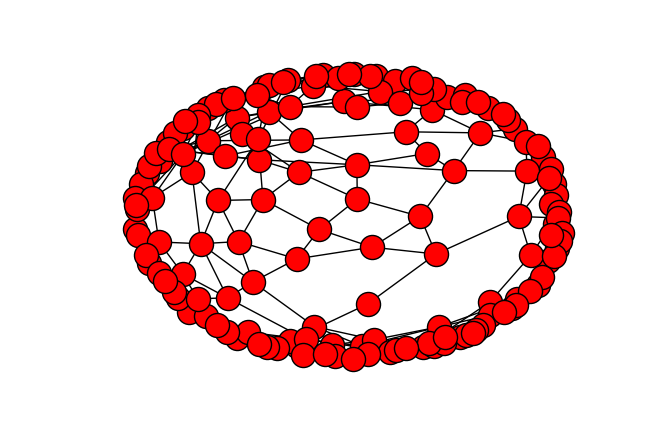

In [255]:
import matplotlib.pyplot as plt
%matplotlib inline
G = nx.Graph()

# make graph
for edge in pairs:
    G.add_edge(edge[0],edge[1])
nx.draw(G,pos=nx.spring_layout(G),arrows = True)

plt.draw()

In [228]:
pairs

{(18, 18),
 (20, 18),
 (20, 22),
 (20, 76),
 (20, 78),
 (22, 18),
 (22, 30),
 (22, 70),
 (22, 72),
 (30, 18),
 (30, 34),
 (34, 18),
 (36, 34),
 (36, 68),
 (38, 34),
 (38, 36),
 (38, 44),
 (44, 46),
 (44, 64),
 (46, 50),
 (46, 62),
 (46, 64),
 (46, 138),
 (50, 62),
 (51, 51),
 (54, 162),
 (54, 5601),
 (58, 54),
 (58, 60),
 (58, 160),
 (60, 50),
 (60, 62),
 (60, 160),
 (66, 36),
 (66, 44),
 (66, 64),
 (66, 68),
 (66, 134),
 (70, 30),
 (70, 68),
 (70, 72),
 (70, 126),
 (72, 122),
 (74, 22),
 (74, 72),
 (74, 76),
 (74, 102),
 (74, 122),
 (75, 75),
 (76, 22),
 (76, 78),
 (76, 100),
 (78, 80),
 (78, 98),
 (80, 82),
 (80, 96),
 (82, 82),
 (94, 94),
 (94, 96),
 (98, 96),
 (98, 100),
 (98, 108),
 (100, 106),
 (102, 100),
 (102, 104),
 (104, 106),
 (104, 116),
 (104, 118),
 (108, 94),
 (108, 106),
 (108, 114),
 (110, 90),
 (110, 110),
 (114, 94),
 (114, 116),
 (114, 220),
 (114, 222),
 (116, 106),
 (116, 216),
 (116, 218),
 (118, 122),
 (120, 118),
 (120, 122),
 (120, 126),
 (126, 122),
 (130, 6

In [242]:
import plotly.plotly as py
from plotly.graph_objs import *

In [245]:
pos1 = nx.spring_layout(G)
pos2=nx.spectral_layout(G)
pos3=nx.spring_layout(G)

In [246]:
goodIndexes = []
blockData = []
for i in range(len(mapData['features'])):
    block = mapData['features'][i]
    if block['properties']['OBJECTID_1'] in blocks:

#   if block['BoroCode']=="3" and block['CTLabel'] in blocks:

        goodIndexes.append(i)
        blockData.append(block['properties']['OBJECTID'])

KeyError: 'OBJECTID_1'

In [247]:
import plotly.plotly as py
from plotly.graph_objs import *

def scatter_nodes(pos, labels=None, color=None, size=20, opacity=1):
    # pos is the dict of node positions
    # labels is a list  of labels of len(pos), to be displayed when hovering the mouse over the nodes
    # color is the color for nodes. When it is set as None the Plotly default color is used
    # size is the size of the dots representing the nodes
    #opacity is a value between [0,1] defining the node color opacity
    L=len(pos)
    trace = Scatter(x=[], y=[],  mode='markers', marker=Marker(size=[]))
    for k in range(L):
        trace['x'].append(pos[k][0])
        trace['y'].append(pos[k][1])
    attrib=dict(name='', text=labels , hoverinfo='text', opacity=opacity) # a dict of Plotly node attributes
    trace=dict(trace, **attrib)# concatenate the dict trace and attrib
    trace['marker']['size']=size
    return trace       

def scatter_edges(G, pos, line_color=None, line_width=1):
    trace = Scatter(x=[], y=[], mode='lines')
    for edge in G.edges():
        trace['x'] += [pos[edge[0]][0],pos[edge[1]][0], None]
        trace['y'] += [pos[edge[0]][1],pos[edge[1]][1], None]  
        trace['hoverinfo']='none'
        trace['line']['width']=line_width
        if line_color is not None: # when it is None a default Plotly color is used
            trace['line']['color']=line_color
    return trace         

In [252]:
graph

{18: array([ 0.96436876,  0.33493579]),
 20: array([ 0.89004462,  0.20447173]),
 22: array([ 0.93020731,  0.28152762]),
 30: array([ 0.98136582,  0.39799365]),
 34: array([ 0.95961533,  0.31913261]),
 36: array([ 0.98063445,  0.38590921]),
 38: array([ 0.98233663,  0.45533951]),
 44: array([ 0.9826259 ,  0.60604114]),
 46: array([ 0.92820949,  0.73672017]),
 50: array([ 0.80944997,  0.87347761]),
 51: array([ 0.66589104,  0.97201325]),
 54: array([ 0.47209056,  0.96205688]),
 58: array([ 0.61603102,  0.94442403]),
 60: array([ 0.73006229,  0.89590699]),
 62: array([ 0.86785407,  0.81824587]),
 64: array([ 0.97150109,  0.64730703]),
 66: array([ 0.98933707,  0.54510229]),
 68: array([ 0.99500917,  0.49319584]),
 70: array([ 0.98305845,  0.41710901]),
 72: array([ 0.95053598,  0.34581791]),
 74: array([ 0.8856598 ,  0.23418923]),
 75: array([ 0.9018457 ,  0.79879095]),
 76: array([ 0.80379435,  0.14956285]),
 78: array([ 0.71710242,  0.05897188]),
 80: array([ 0.7483796 ,  0.06994882]),
